# Loading Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import FunctionTransformer  
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Reading Data

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# Exploring Data

In [4]:
df.shape

(100000, 9)

In [5]:
df.ndim

2

In [6]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of diabeties Patients')

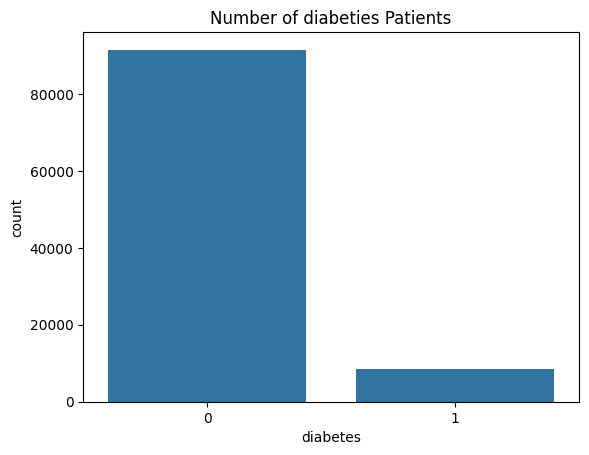

In [7]:

sns.countplot(data=df , x='diabetes')
plt.title('Number of diabeties Patients')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Features name

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

# Missing Values

In [12]:
print('Missing data sum :')
print(df.isnull().sum())

print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)

Missing data sum :
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Missing data percentage (%):
gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64


# Seperate Categorical and Numerical Features

In [13]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  2
********************************************************************************
Categorical variables column name: ['gender', 'smoking_history']


In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


# Checking Duplicating Values

In [15]:
df.duplicated().sum()

3854

In [16]:

df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [17]:
df['gender'].nunique()

3

In [18]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [19]:
df=df[df['gender']!='Other']

In [20]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [21]:
df['diabetes'].sample(10)

16413    0
47760    0
44344    0
44575    0
58214    0
65475    0
91723    0
7710     1
54131    0
50968    0
Name: diabetes, dtype: int64

In [22]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

[Text(0.5, 1.0, 'Correlation Matrix')]

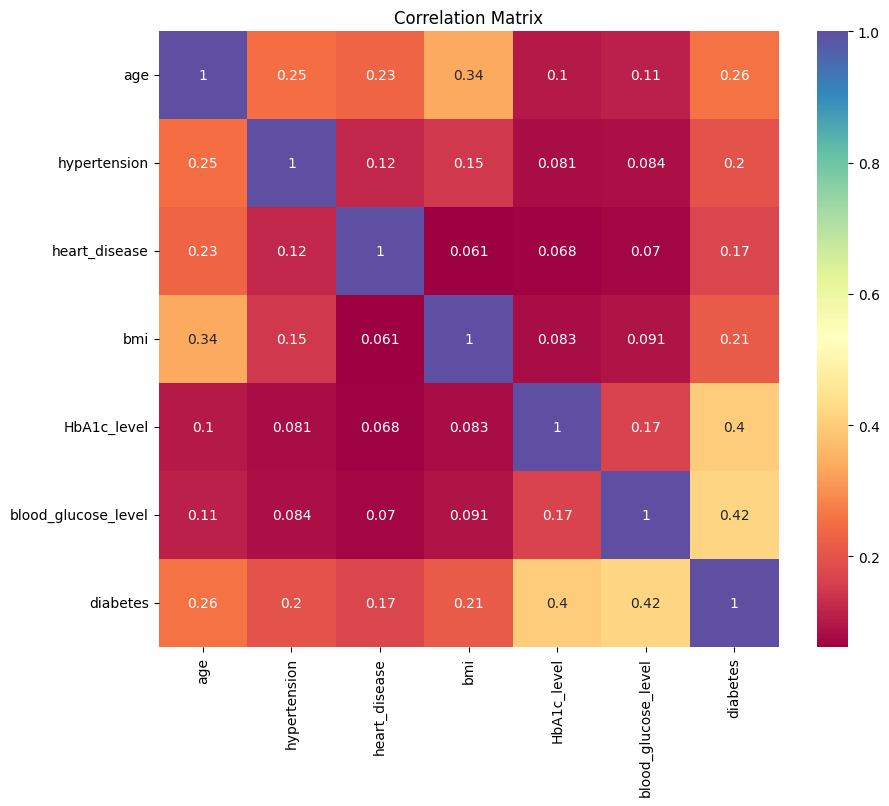

In [24]:
numeric_data = df.select_dtypes(include='number')
corr = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [25]:
corr_matrix = numeric_data.corr().round(2)
corr_matrix              

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.00,0.25,0.23,0.34,0.10,0.11,0.26
hypertension,0.25,1.00,0.12,0.15,0.08,0.08,0.20
heart_disease,0.23,0.12,1.00,0.06,0.07,0.07,0.17
bmi,0.34,0.15,0.06,1.00,0.08,0.09,0.21
HbA1c_level,0.10,0.08,0.07,0.08,1.00,0.17,0.40
blood_glucose_level,0.11,0.08,0.07,0.09,0.17,1.00,0.42
diabetes,0.26,0.20,0.17,0.21,0.40,0.42,1.00


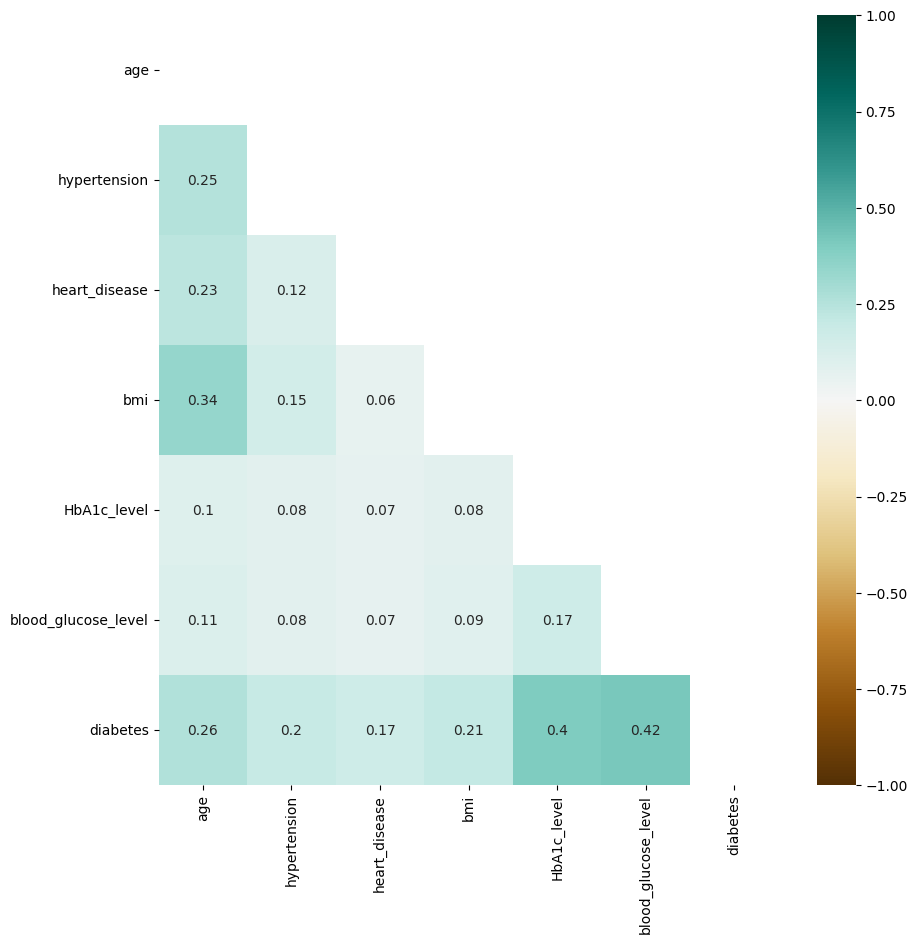

In [26]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [27]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  2
********************************************************************************
Categorical variables column name: ['gender', 'smoking_history']


In [28]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


# Visualizing Categorical Features

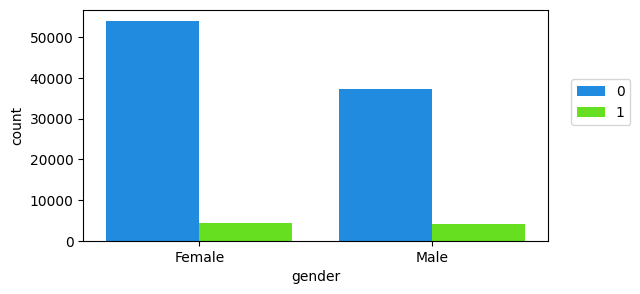

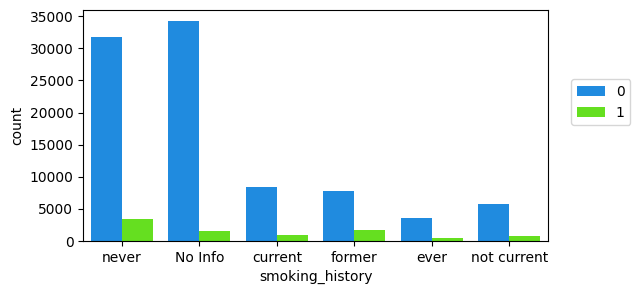

In [29]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='diabetes',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

# Barplot of numerical features:

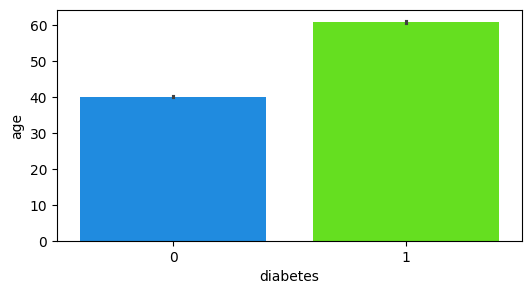

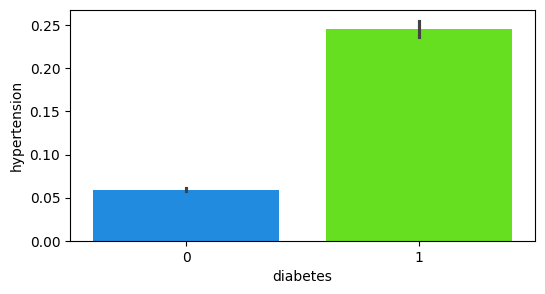

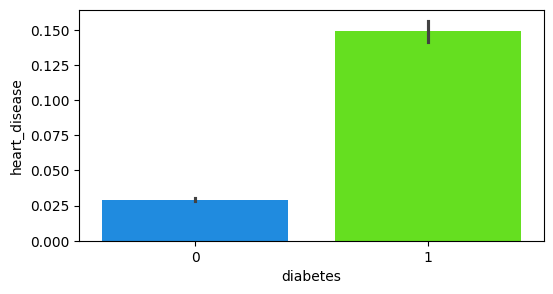

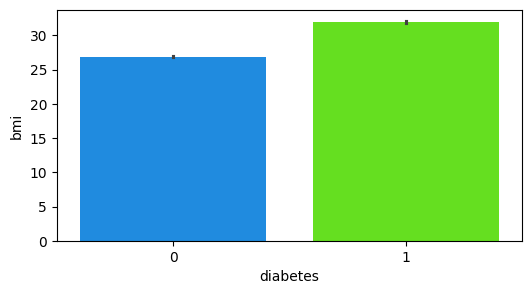

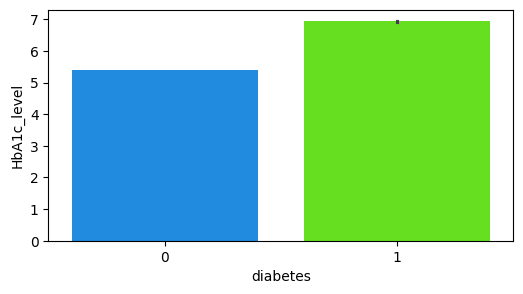

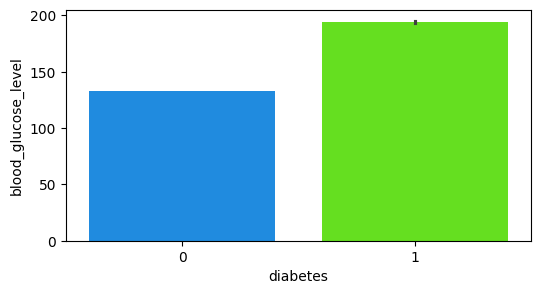

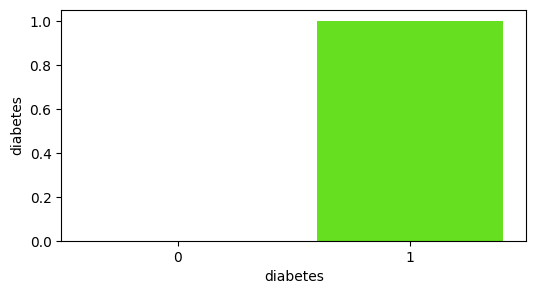

In [30]:
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='diabetes',y=col,palette='gist_rainbow_r')

# Handling Missing Values

In [31]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Dropping irrelevant feature

In [33]:

train  = df
train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [34]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [35]:
train.shape

(99982, 9)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [37]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [38]:
train_data_cat.head(3)

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never


In [39]:
train_data_num.head(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0


# Converting categorical features into numerical

In [40]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list(),drop_first=True)
train_data_cata_encoded.head()

,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,True,False,False,False,True,False
3,False,True,False,False,False,False
4,True,True,False,False,False,False


In [41]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,True,False,80.0,0,1,25.19,6.6,140,0
1,False,False,False,False,False,False,54.0,0,0,27.32,6.6,80,0
2,True,False,False,False,True,False,28.0,0,0,27.32,5.7,158,0
3,False,True,False,False,False,False,36.0,0,0,23.45,5.0,155,0
4,True,True,False,False,False,False,76.0,1,1,20.14,4.8,155,0


# Seperate dependant and independant feature

In [42]:
x = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
print(x.shape)
print(y.shape)

(99982, 12)
(99982,)


# Scailing the data

In [44]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [45]:
x

array([[-8.41175470e-01, -3.19978113e-01, -2.04223016e-01, ...,
        -3.21050843e-01,  1.00169205e+00,  4.77087849e-02],
       [-8.41175470e-01, -3.19978113e-01, -2.04223016e-01, ...,
        -1.13990770e-04,  1.00169205e+00, -1.42615716e+00],
       [ 1.18881260e+00, -3.19978113e-01, -2.04223016e-01, ...,
        -1.13990770e-04,  1.61088614e-01,  4.89868567e-01],
       ...,
       [ 1.18881260e+00, -3.19978113e-01, -2.04223016e-01, ...,
         7.67300443e-02,  1.61088614e-01,  4.16175270e-01],
       [-8.41175470e-01, -3.19978113e-01, -2.04223016e-01, ...,
         1.22035010e+00, -1.42671787e+00, -9.34868509e-01],
       [-8.41175470e-01,  3.12521376e+00, -2.04223016e-01, ...,
        -7.36912680e-01,  1.00169205e+00, -1.18051283e+00]])

# Splitting the dataset

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((69987, 12), (29995, 12))

# Building Classifiers

In [47]:
accuracy = {}

# Logistic Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9604934155692615


# Confusion Matrix

<Axes: >

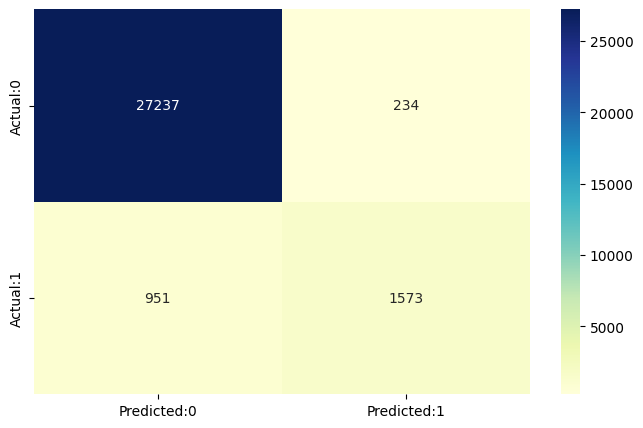

In [49]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Classification Report

In [50]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27471
           1       0.87      0.62      0.73      2524

    accuracy                           0.96     29995
   macro avg       0.92      0.81      0.85     29995
weighted avg       0.96      0.96      0.96     29995



# Predicting

In [51]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [52]:
test.sample(10)

,Actual,Y test predicted
19026,0,0
46423,0,0
99877,0,0
54835,0,0
75041,0,0
67331,0,0
81696,1,0
92947,0,0
82069,0,0
19289,0,0


# DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeRegressor


dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.9719286547757959


<Axes: >

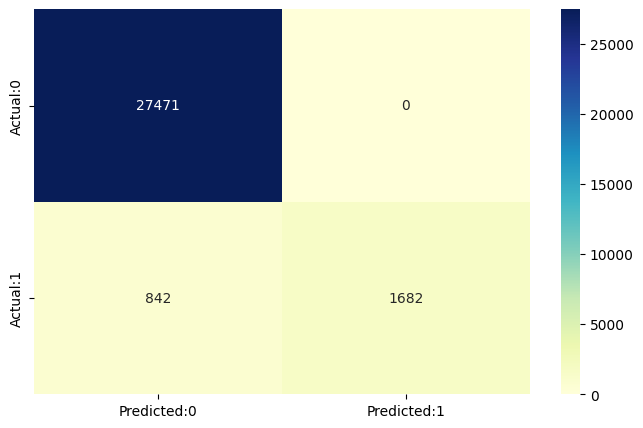

In [54]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27471
           1       1.00      0.67      0.80      2524

    accuracy                           0.97     29995
   macro avg       0.99      0.83      0.89     29995
weighted avg       0.97      0.97      0.97     29995



In [56]:
y_pred_test = dtc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [57]:
test.head(5)

,Actual,Y test predicted
61815,0,0
88618,0,0
64217,0,0
21498,0,0
54333,0,0


In [58]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9719286547757959


<Axes: >

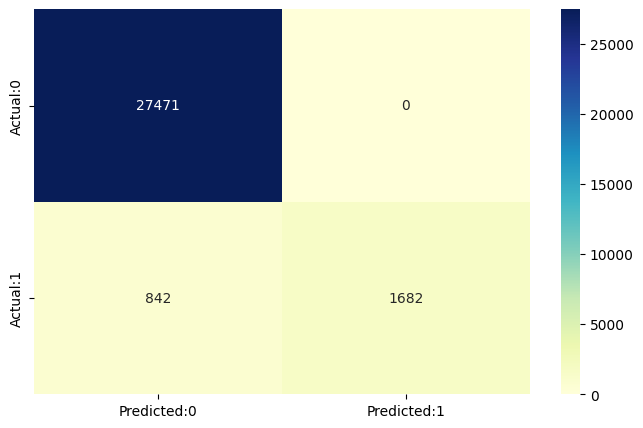

In [59]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [60]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.9721953658943158


<Axes: >

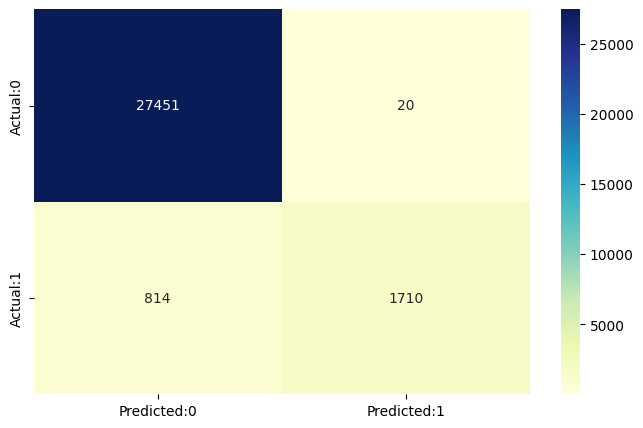

In [61]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# SVM

In [62]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

0.9619603267211202


<Axes: >

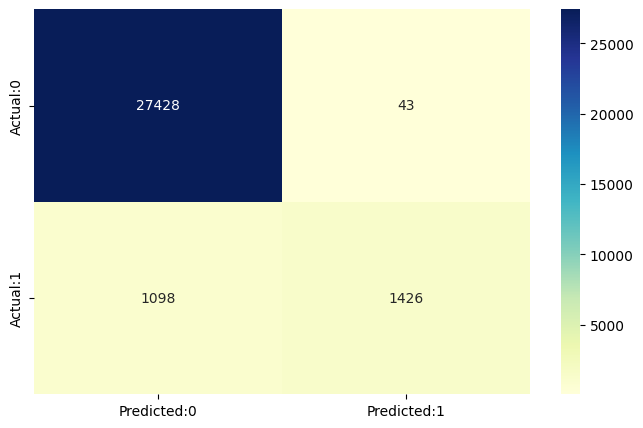

In [63]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred5)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [64]:
accuracy

{'LogisticRegression(max_iter=200)': 96.04934155692615,
 'DecisionTreeClassifier(max_depth=3)': 97.19286547757959,
 'RandomForestClassifier(max_depth=5)': 97.19286547757959,
 'GradientBoostingClassifier()': 97.21953658943157,
 'SVC()': 96.19603267211203}

# Handling this data using SMOTE

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)
x1.shape, y1.shape 

((182964, 12), (182964,))

In [67]:
df=pd.DataFrame(x1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.841175,-0.319978,-0.204223,-0.32123,1.359831,-0.262364,1.692577,-0.284467,4.935916,-0.321051,1.001692,0.047709
1,-0.841175,-0.319978,-0.204223,-0.32123,-0.735386,-0.262364,0.537899,-0.284467,-0.202597,-0.000114,1.001692,-1.426157
2,1.188813,-0.319978,-0.204223,-0.32123,1.359831,-0.262364,-0.616779,-0.284467,-0.202597,-0.000114,0.161089,0.489869
3,-0.841175,3.125214,-0.204223,-0.32123,-0.735386,-0.262364,-0.261494,-0.284467,-0.202597,-0.583225,-0.492714,0.416175
4,1.188813,3.125214,-0.204223,-0.32123,-0.735386,-0.262364,1.514935,3.515345,4.935916,-1.081957,-0.679515,0.416175


# Splitting the oversampling data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = True,random_state = 3)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128074, 12)
(54890, 12)
(128074,)
(54890,)


In [70]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.8873018764802332


<Axes: >

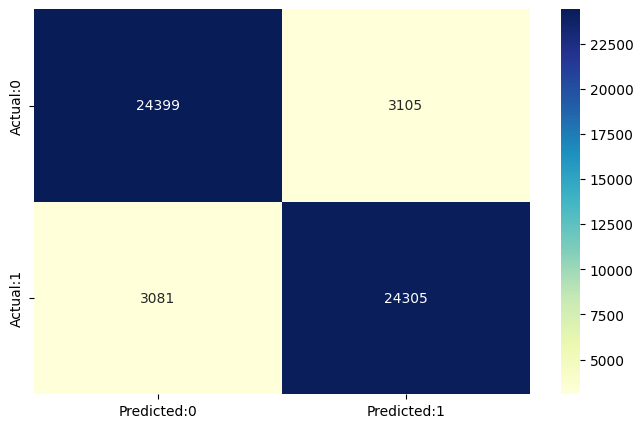

In [71]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [72]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     27504
           1       0.89      0.89      0.89     27386

    accuracy                           0.89     54890
   macro avg       0.89      0.89      0.89     54890
weighted avg       0.89      0.89      0.89     54890



In [73]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [74]:
test.head()

,Actual,Y test predicted
67487,0,0
142050,1,1
86208,0,0
152068,1,1
178912,1,1


In [75]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print(r2_score(y_test, knn_predict))
accuracy[str(lr)] = r2_score(y_test, knn_predict)*100

0.8129340963164364


<Axes: >

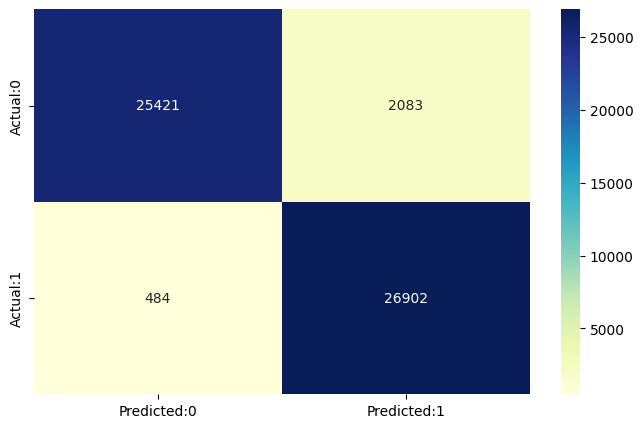

In [76]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,knn_predict)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [77]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     27504
           1       0.93      0.98      0.95     27386

    accuracy                           0.95     54890
   macro avg       0.95      0.95      0.95     54890
weighted avg       0.95      0.95      0.95     54890



In [78]:
y_pred_test = knn_model.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [79]:
test.sample(10)

,Actual,Y test predicted
135694,1,1
141043,1,1
135104,1,1
34950,0,0
32670,0,0
139396,1,1
52695,0,0
99414,0,0
107527,1,1
99148,0,0


# Deep Learning

In [80]:
import tensorflow as tf
from tensorflow import keras

es=tf.keras.callbacks.EarlyStopping(
   min_delta=0.001,
   patience=10,
   restore_best_weights=True)

# Create Neural Network

In [81]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[12], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [83]:
train = model.fit(X_train, y_train, epochs=10,batch_size=100)

Epoch 1/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8641 - loss: 0.2992
Epoch 2/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9013 - loss: 0.2051
Epoch 3/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9088 - loss: 0.1875
Epoch 4/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9122 - loss: 0.1793
Epoch 5/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9150 - loss: 0.1757
Epoch 6/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9142 - loss: 0.1748
Epoch 7/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9164 - loss: 0.1712
Epoch 8/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9168 - loss: 0.1699
Epoch 9/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9182 - loss: 0.1682
Epoch 10/10
1281/1281 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9173 - loss: 0.1694


In [84]:
model.evaluate(X_test, y_test)

1716/1716 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9194 - loss: 0.1689


[0.16918551921844482, 0.9184186458587646]

# Testing the model

In [85]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

1716/1716 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step


67487     0
142050    1
86208     0
152068    1
178912    1
66904     0
138719    1
105078    1
13343     0
68364     0
118989    1
Name: diabetes, dtype: int64

# Confusion Matrix

<Axes: >

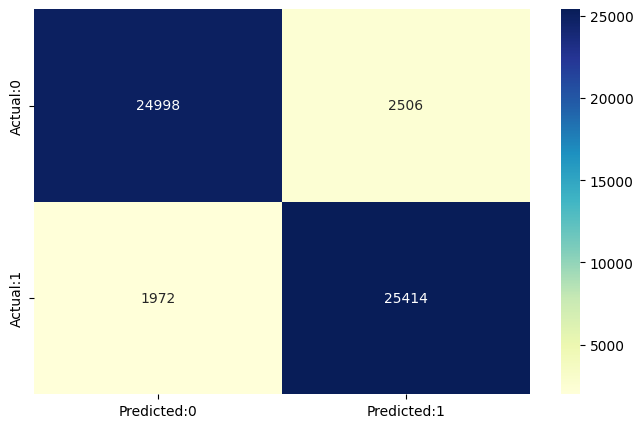

In [86]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [87]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(12,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,969 (1.97 MB)

 Trainable params: 515,969 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [89]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [90]:
model.fit(X_train, y_train,epochs=10, batch_size=100, validation_split=0.30,callbacks=cb)

Epoch 1/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7980 - loss: 0.3816 - val_accuracy: 0.8955 - val_loss: 0.2275
Epoch 2/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8933 - loss: 0.2365 - val_accuracy: 0.9035 - val_loss: 0.2052
Epoch 3/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9003 - loss: 0.2104 - val_accuracy: 0.9085 - val_loss: 0.1889
Epoch 4/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9048 - loss: 0.1984 - val_accuracy: 0.9114 - val_loss: 0.1832
Epoch 5/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9086 - loss: 0.1902 - val_accuracy: 0.9130 - val_loss: 0.1777
Epoch 6/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9107 - loss: 0.1860 - val_accuracy: 0.9145 - val_loss: 0.1778
Epoch 7/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9115 - loss: 0.1825 - val_accuracy: 0.9154 - val_loss: 0.1761
Epoch 8/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9125 - loss: 0.1825 - val_accuracy: 0

In [91]:
model.evaluate(X_test, y_test)

1716/1716 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9166 - loss: 0.1740


[0.1736280620098114, 0.9171434044837952]

In [92]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

1716/1716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     27504
           1       0.89      0.95      0.92     27386

    accuracy                           0.92     54890
   macro avg       0.92      0.92      0.92     54890
weighted avg       0.92      0.92      0.92     54890



# Confusion Matrix

<Axes: >

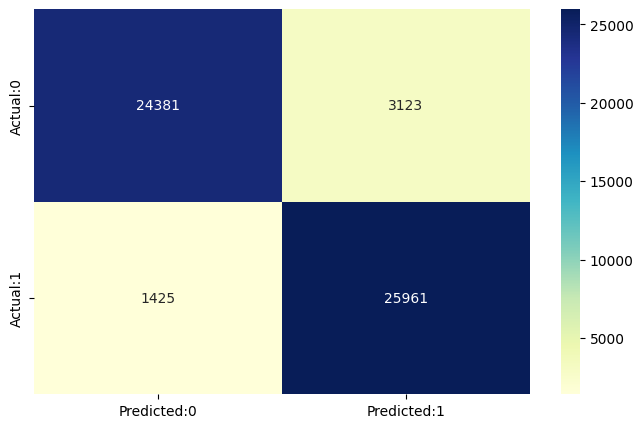

In [93]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")